[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bigid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data loaded successfully


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A



🧾 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None

📊 Null values:
 Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

📏 Headline Length Stats:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


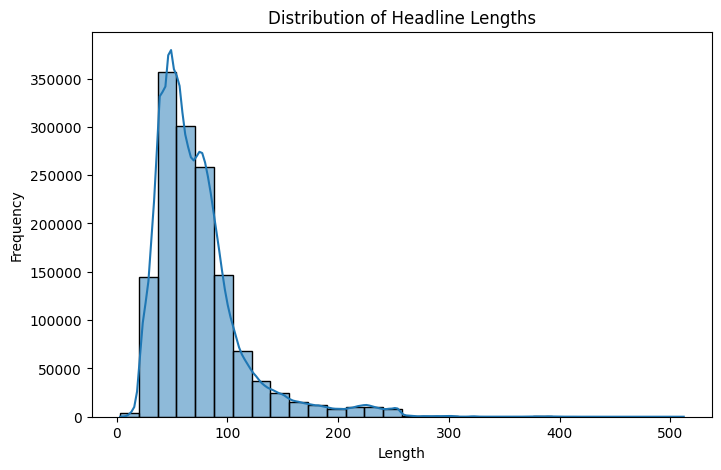


📰 Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


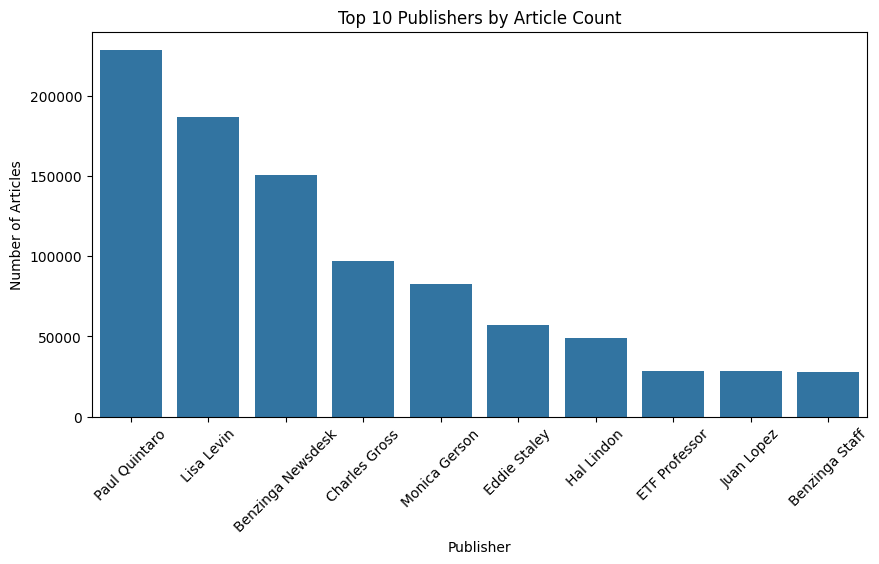

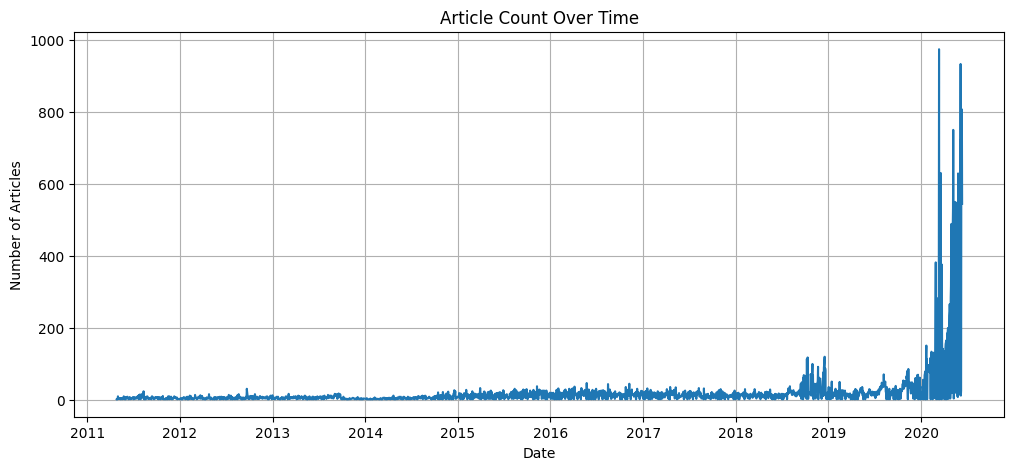

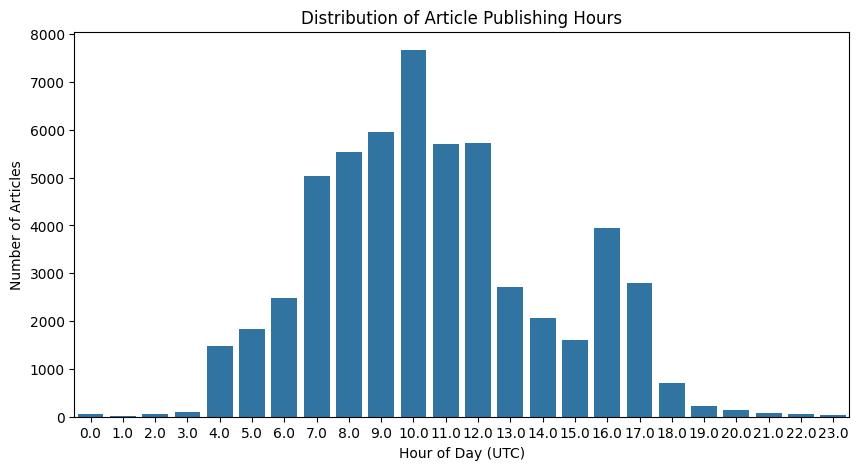

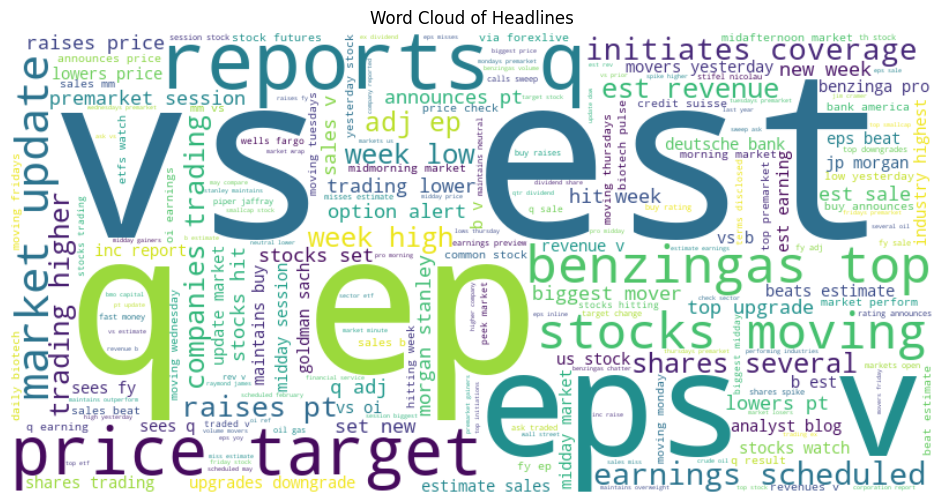

In [3]:
# notebooks/task1_eda.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

# Optional: Download stopwords if not already
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('../Data/raw_analyst_ratings.csv')  
print("Data loaded successfully")

# Preview
display(df.head())

# --- 1. Basic Info ---
print("\n🧾 Dataset Info:")
print(df.info())
print("\n📊 Null values:\n", df.isnull().sum())

# --- 2. Descriptive Statistics: Headline Length ---
df['headline_length'] = df['headline'].astype(str).apply(len)
print("\n📏 Headline Length Stats:")
print(df['headline_length'].describe())

# Plot headline length distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# --- 3. Articles per Publisher ---
publisher_counts = df['publisher'].value_counts().head(10)
print("\n📰 Top Publishers:")
print(publisher_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.xticks(rotation=45)
plt.title('Top 10 Publishers by Article Count')
plt.ylabel('Number of Articles')
plt.xlabel('Publisher')
plt.show()

# --- 4. Date Analysis ---
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['date_only'] = df['date'].dt.date
daily_counts = df.groupby('date_only').size()

plt.figure(figsize=(12, 5))
daily_counts.plot()
plt.title('Article Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

# --- 5. Publishing Hour Analysis ---
df['hour'] = df['date'].dt.hour
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df)
plt.title('Distribution of Article Publishing Hours')
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Number of Articles')
plt.show()

# --- 6. Word Cloud for Headlines ---
stop_words = set(stopwords.words('english'))
headlines = ' '.join(df['headline'].dropna().astype(str).tolist()).lower()
headlines = re.sub(r'[^a-z\s]', '', headlines)
headlines = ' '.join([word for word in headlines.split() if word not in stop_words])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(headlines)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Headlines")
plt.show()
